In [30]:
import numpy as np
import pandas as pd
import matplotlib as plt
import math
import scipy
import seaborn as sns

from theano import function, shared
from theano import tensor as TT
import theano
import theano.sandbox.rng_mrg
import matplotlib.pyplot as plt
%matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\anmol\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [405]:
# np.log(x)/1+x
# (1/x(1+x)) - (np.log(x)/(1+x)**2)
#4*x*y + (x+y*y)**2
#(4*x*y + (x+y*y)**2).diff(x).diff(y)

In [410]:
def newton(z, f, fprime, max_iter=100, tol=1e-6):
    """The Newton-Raphson method."""
    for i in range(max_iter):
        step = f(z)/fprime(z)
        if abs(step) < tol:
            return i, z
        z -= step
    return i, z

In [411]:
f = lambda x,y: 4*x*y + (x+y*y)**2
fprime = lambda x,y: (4*x*y + (x+y*y)**2).diff(x).diff(y)

In [412]:
f(0,2)

In [327]:
def Newton(f, dfdx, x, eps):
    f_value = f(x)
    iteration_counter = 0
    while abs(f_value) > eps and iteration_counter < 100:
        try:
            x = x - float(f_value)/dfdx(x)
        except ZeroDivisionError:
            print ("Error! - derivative zero for x = ", x)
            sys.exit(1)     # Abort with error

        f_value = f(x)
        iteration_counter += 1

    # Here, either a solution is found, or too many iterations
    if abs(f_value) > eps:
        iteration_counter = -1
    return x, iteration_counter

def f(x):
    return np.log(x)/1+x

def dfdx(x):
    return (1/x(1+x)) - (np.log(x)/(1+x)**2)

solution, no_iterations = Newton(f, dfdx, x=1000, eps=1.0e-6)

if no_iterations > 0:    # Solution found
    print ("Number of function calls: %d" % (1 + 2*no_iterations))
    print ("A solution is: %f" % (solution))
else:
    print ("Solution not found!")

TypeError: 'int' object is not callable

In [333]:
def bisection(f, x_L, x_R, eps, return_x_list=False):
    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print ("Error! Function does not have opposite \
                 signs at interval endpoints!")
        sys.exit(1)
    x_M = float(x_L + x_R)/2.0
    f_M = f(x_M)
    iteration_counter = 1
    if return_x_list:
        x_list = []

    while abs(f_M) > eps:
        if f_L*f_M > 0:   # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
        x_M = float(x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter += 1
        if return_x_list:
            x_list.append(x_M)
    if return_x_list:
        return x_list, iteration_counter
    else:
        return x_M, iteration_counter

def f(x):
    return np.log(x)/1+x

a = 0;   b = 1000

solution, no_iterations = bisection(f, a, b, eps=1.0e-6)

print ("Number of function calls: %d" % (1 + 2*no_iterations))
print ("A solution is: %f" % (solution))

Number of function calls: 63
A solution is: 0.567143


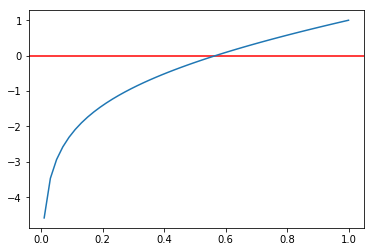

In [334]:
import scipy.linalg as la
def f(x):
    return np.log(x)/1+x
x = np.linspace(-1,1,100)
plt.axhline(0, c='red')
plt.plot(x,f(x));

In [157]:
from sympy import symbols, hessian, Function, N

x, y = symbols('x y')
f = symbols('f', cls=Function)

f = 4*x*y + (x+y*y)**2

H = hessian(f, [x, y]).subs([(x,1), (y,1)])
H, N(H.condition_number())

⎛⎡2  8 ⎤                  ⎞
⎜⎢     ⎥, 12.0419570196632⎟
⎝⎣8  16⎦                  ⎠

In [676]:
def f(x):
    return np.log(x)/1+x

def grad(x):
    return np.array(np.log(x[1])/1+x[1]) 

a = 0.1 # learning rate
x0 = np.array([0.0,1.0])
print('Start', x0)
for i in range(41):
    x0 -= a * grad(x0)
    if i%5 == 0:
        print(i, x0)

Start [0. 1.]
0 [-0.1  0.9]
5 [-0.35444993  0.64555007]
10 [-0.41655362  0.58344638]
15 [-0.42958812  0.57041188]
20 [-0.43220663  0.56779337]
25 [-0.43272763  0.56727237]
30 [-0.43283109  0.56716891]
35 [-0.43285162  0.56714838]
40 [-0.4328557  0.5671443]


In [1167]:
def newton(f,Df,x0,epsilon,max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number
        Stopping criteria is abs(f(x)) < epsilon.
    max_iter : integer
        Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> Df = lambda x: 2*x - 1
    >>> newton(f,Df,1,1e-8,10)
    Found solution after 5 iterations.
    1.618033988749989
    '''
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. one solution found.')
    return None

In [1168]:
f = lambda x: np.log(x)/1+x
Df = lambda x: 2*x - 1
newton(f,Df,1,1e-8,10)
print(approx)

Exceeded maximum iterations. one solution found.
1.4655712318767877


In [1169]:
def newton_method_sqrt(number, number_iters = 500):
    a = float(number) # number to get square root of
    for i in range(number_iters): # iteration number
        number = 0.5 * (number + a / number) # update
	  # x_(n+1) = 0.5 * (x_n +a / x_n)
    return number



In [1170]:
x = np.random.randint(-10,10)
newton_method_sqrt(np.log(x)/1+x)

# Problem 3 ->> Part 1

# a->>

In [1171]:
def dx(f, x,y):
    return abs(0-f(x,y))

def newtons_method_p3_1(f, df, x0,y0, e):
    delta = dx(f, x0,y0)
    while delta < e:
        x0 = x0 - f(x0,y0)/df(x0,y0)
#         y0 = y0 - f(y0)/df(y0)
        delta = dx(f, x0,y0)
     
    print ('Root is at: ', x0,y0)
    print ('f(x) at root is: ', f(x0,y0))

In [1172]:
def f(x,y):
    return (4*x*y + (x + y)**2)

def df(x,y):
    return 6

In [1173]:
x0s = [0, .5, 1]
y0s = [0, .5, 1]
for x0 in x0s:
    for y0 in y0s:
        newtons_method_p3_1(f, df, x0,y0, 1e-5)


KeyboardInterrupt: 

# b->>

# Problem 3 ->> Part 2

# a ->>

In [ ]:
def dx(f, x):
    return abs(0-f(x))

def newtons_method_p3_2(f, df, x0, e):
    delta = dx(f, x0)
    while delta > e:
        x0 = x0 - f(x0)/df(x0)

        delta = dx(f, x0)
     
    print ('Root is at: ', x0)
    print ('f(x) at root is: ', f(x0))

def f(x):
    return np.log(x)/1+x

def df(x):
    return (1/x(1+x)) - (np.log(x)/(1+x)**2)

In [ ]:
x0s = [0, .5, 1]
for x0 in x0s:
    newtons_method_p3_2(f, df, x0, 1e-5)
    

# b->>

In [419]:
def secant(f, x0, x1, eps):
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x1) > eps and iteration_counter < 100:
        try:
            denominator = float(f_x1 - f_x0)/(x1 - x0)
            x = x1 - float(f_x1)/denominator
        except ZeroDivisionError:
            print ("Error! - denominator zero for x = ", x)
            sys.exit(1)     # Abort with error
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        iteration_counter += 1
    # Here, either a solution is found, or too many iterations
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x, iteration_counter

def f(x):
    return np.log(x)/1+x

x0 = 1000;   x1 = x0 - 1

solution, no_iterations = secant(f, x0, x1, eps=1.0e-6)

if no_iterations > 0:    # Solution found
    print ("Number of function calls: %d" % (2 + no_iterations))
    print ("A solution is: %f" % (solution))
else:
    print ("Solution not found!")

Number of function calls: 3
A solution is: -5.901351


In [450]:
for x in range (0,10):
    print(np.log(x)/1+x)

-inf
1.0
2.6931471805599454
4.09861228866811
5.386294361119891
6.6094379124341005
7.7917594692280545
8.945910149055313
10.079441541679836
11.19722457733622


In [451]:
for i in range (0,10):
    for j in range (0,10):
        print (4*i*j + (i+j*j)**2)

0
1
16
81
256
625
1296
2401
4096
6561
1
8
33
112
305
696
1393
2528
4257
6760
4
17
52
145
356
769
1492
2657
4420
6961
9
28
73
180
409
844
1593
2788
4585
7164
16
41
96
217
464
921
1696
2921
4752
7369
25
56
121
256
521
1000
1801
3056
4921
7576
36
73
148
297
580
1081
1908
3193
5092
7785
49
92
177
340
641
1164
2017
3332
5265
7996
64
113
208
385
704
1249
2128
3473
5440
8209
81
136
241
432
769
1336
2241
3616
5617
8424


# Problem 3 part 1 - a ->>

[0.29642623 0.44821494] 1.526096371412172 1
[0.29348119 0.20863333] 0.9189379351976257 2
[0.29325763 0.0527075 ] 0.6538989375128998 3
[ 0.29507042 -0.04349118] 0.5425919654694539 4
[ 0.29802249 -0.09991608] 0.4969024600839461 5
[ 0.30153973 -0.13191533] 0.4787719185872728 6


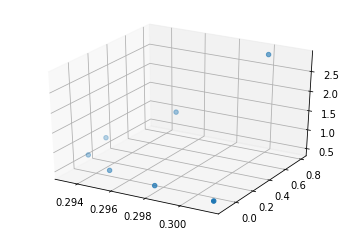

In [1195]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv

def func(x):
    return 4*x[0]*x[1] + (x[0] + x[1]**2)*2

# first order derivatives of the function
def dfunc(x):
    df1 = 2*(x[0] + x[1]**2) + 4*x[1]
    df2 = 4*(np.power(x[1], 3) + x[0]*x[1] +x[0])
    return np.array([df1, df2])

def invhess(x):
    df11 = 2
    df12 = 4*x[1] + 4
    df21 = -400*x[0]
    df22 = 4*(x[1] + 1)
    hess = np.array([[df11, df12], [df21, df22]])
    return inv(hess)

def newton(x, max_int):
    miter = 1
    step = .5
    vals = []
    objectfs = []
    # you can customize your own condition of convergence, here we limit the number of iterations
    while miter <= max_int:
        vals.append(x)
        objectfs.append(func(x))
        temp = x-step*(invhess(x).dot(dfunc(x)))
        if np.abs(func(temp)-func(x))>0.01:
            x = temp
        else:
            break
        print(x, func(x), miter)
        miter += 1
    return vals, objectfs, miter

start = [0.3, 0.8]
val, objectf, iters = newton(start, 1000)

x = np.array([i[0] for i in val])
y = np.array([i[1] for i in val])
z = np.array(objectf)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='newton method')
plt.show()

The value and maximal is 2.9999765913950025, 179.99550559003347


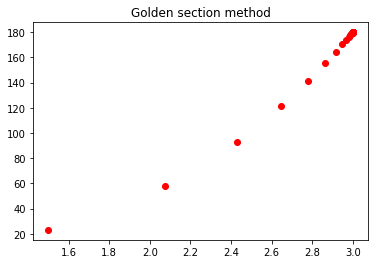

In [1194]:
import numpy as np
import matplotlib.pyplot as plt

seg = (np.sqrt(5)-1)/2

def golden(f, lower, upper, merror):
    error = 1000
    vals = []
    vals.append((lower+upper)/2)
    objectf = []
    objectf.append(f((lower+upper)/2))
    # you can customize your own condition of convergence, here we limit the error term
    while error >= merror:
        temp1 = upper-seg*(upper-lower)
        temp2 = lower+seg*(upper-lower)
        if f(temp1)-f(temp2)>0:
            upper = temp2
        else:
            lower = temp1
        error = np.abs(f(temp1)-f(temp2))
        vals.append((lower+upper)/2)
        objectf.append(f((lower+upper)/2))
    return (temp2+temp1)/2, f((temp2+temp1)/2), vals, objectf

# an example
obj = lambda x: 4*x*x + (x+x*x)**2
(ub, lb) = (3, 0)

val, maxima, xs, ys = golden(obj, lb, ub, 0.003)

print("The value and maximal is "+str(val)+", "+str(maxima))
plt.plot(xs,ys,'ro')
plt.title('Golden section method')
plt.savefig('gsr.jpg')

In [1196]:
golden(func,3,0,0.003)

TypeError: 'float' object is not subscriptable

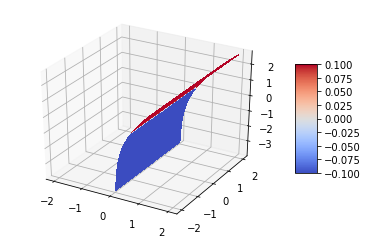

In [470]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
z = np.log(x)/1+x
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=\
       0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('surface.jpg')

In [1197]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
import sys
import warnings
warnings.filterwarnings("ignore")

def func1(x):
    return np.log(x)/(1+x)

def dfunc1(x):
    df1 = (1/(x*(x+1))) - (np.log(x)/(x+1)**2)
    #df2 = -(np.log(x[0])/(x[1]+1)**2)
    return df1

def ddfunc1(x):
    ddf = float(2*np.log(x)/(x+1)*3) - float(1/x2(x+1)) - (2/x*(x+1)**2)
    return ddf


def n_m(x, eps):
    df_x = dfunc1(x)
    ddf_x = ddfunc1(x)
    iter = 0
    x_new = 0
    vals = []
    objectfs = []
    print("Newton's method:")
    while np.abs(df_x) > eps and iter < 100:
        vals.append(x)
        objectfs.append(func(x))
        x_new = x - (df_x/ddf_x)
        print("x_new = ",x_new)
        x = x_new
        df_x = dfunc(x)
        print("f'(x_new) = ", df_x)
        iter = iter + 1
    return x, iter, vals, objectfs


def secant_mth(x0, x1, eps):
    df_x0 = dfunc1(x0)
    df_x1 = dfunc1(x1)
    iter = 0
    x = 0
    vals = []
    objs = []
    vals.append(x)
    objs.append(df_x1)
    print("Secant Method:")
    while abs(df_x1) > eps and iter < 10000:
        denominator = (df_x1 - df_x0) / (x1 - x0)
        x = x1 - df_x1/denominator
        print("x = ",x)
        vals.append(x)
        x0 = x1
        x1 = x
        df_x0 = df_x1
        df_x1 = dfunc(x1)
        objs.append(df_x1)
        print("f'(x) = ", df_x1)
        iter = iter + 1
    return x, iter, objs, vals



def print_statements(soln, i):
    if i > 0:    # Solution found
        print("Number of function calls: %d" % (2 + i))
        print("A solution is: %f" % (soln))
    else:
        print("Solution not found!")




solution, no_iter, vals, objectfs = n_m(0.8, 1e-1)
print_statements(solution, no_iter)
print("\n\n")


plt.scatter(vals, objectfs)
plt.xlabel("X")
plt.ylabel("f(X)")
plt.title("Newton's method")
plt.show()

x0 = 0.3
x1 = 0.8
solution, no_iter, ob, vals= secant_mth(x0, x1, eps = 1e-1)
print_statements(solution, no_iter)

plt.scatter(vals, ob)
plt.xlabel("X")
plt.ylabel("f(X)")
plt.title("Secant method")
plt.show()

TypeError: 'numpy.ndarray' object is not callable

# Problem 2

In [620]:
oring = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/space-shuttle/o-ring-erosion-only.data", delim_whitespace = True)


In [ ]:
oring = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/space-shuttle/o-ring-erosion-only.data", delim_whitespace = True)
my_oring_cols = ["n_risk", "n_fail", "temp", "psi", "order"]
oring.columns = my_oring_cols

In [623]:
oring.describe()

,n_risk,n_fail,temp,psi,order
count,22.0,22.000000,22.000000,22.000000,22.000000
mean,6.0,0.318182,69.727273,156.818182,12.500000
std,0.0,0.567900,7.179215,66.000459,6.493587
min,6.0,0.000000,53.000000,50.000000,2.000000
25%,6.0,0.000000,67.000000,100.000000,7.250000
50%,6.0,0.000000,70.000000,200.000000,12.500000
75%,6.0,0.750000,75.000000,200.000000,17.750000
max,6.0,2.000000,81.000000,200.000000,23.000000


In [1129]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np
import pandas as pd
from theano import function, shared
from theano import tensor as TT
import theano
import theano.sandbox.rng_mrg
x1 = np.array(oring.temp)
x2 = np.array(oring.n_fail)
print(x1,x2)

[70 69 68 67 72 73 70 57 63 70 78 67 53 67 75 70 81 76 79 75 76 58] [1 0 0 0 0 0 0 1 1 1 0 0 2 0 0 0 0 0 0 0 0 1]


In [1130]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))
def sig(x, Θ_1, Θ_2):                                                        
    z = (Θ_1+ Θ_2*x).astype("float_")                                              
    return 1.0 / (1.0 + np.exp(-z)) 
def gradient(x, y, Θ_1, Θ_2):                                                         
    sigmoid_probs = sig(x, Θ_1, Θ_2)                                        
    return np.array([[np.sum((y - sigmoid_probs) * x),                          
                     np.sum((y - sigmoid_probs) * 1)]])
def hessian(x, y, Θ_1, Θ_2):                                                          
    sigmoid_probs = sig(x, Θ_1, Θ_2)                                        
    d1 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x * x)                  
    d2 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x * 1)                  
    d3 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * 1 * 1)                  
    H = np.array([[d1, d2],[d2, d3]])                                           
    return H
def log_lh(x, y, Θ_1, Θ_2):                                                                
    sigmoid_probs = sig(x, Θ_1, Θ_2)                                        
    return np.sum(y * np.log(sigmoid_probs)
                  + (1 - y) * np.log(1 - sigmoid_probs))    

In [1164]:
print("Gradient:",gradient(oring.temp,oring.n_fail,0.4,0.6))
print("Hessian-Matrix:",hessian(oring.temp,oring.n_fail,0.4,0.6))


Gradient: [[-1110.   -15.]]
Hessian-Matrix: [[3.36946027e-11 6.29496455e-13]
 [6.29496455e-13 1.17683641e-14]]


In [1132]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [1133]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(22)
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights,predictions

In [1134]:
logistic_regression(x1, x2, 10, learning_rate, add_intercept = False)

-36.945156769742134


(array([-0.0004493, -0.0004493, -0.0004493, -0.0004493, -0.0004493,
        -0.0004493, -0.0004493, -0.0004493, -0.0004493, -0.0004493,
        -0.0004493, -0.0004493, -0.0004493, -0.0004493, -0.0004493,
        -0.0004493, -0.0004493, -0.0004493, -0.0004493, -0.0004493,
        -0.0004493, -0.0004493]), 0.000764596168748201)

In [1176]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
%time clf.fit(x1.reshape(-1,1), x2)
print("clf.predict data for oring_temp:",clf.predict(x1.reshape(-1,1)))
print("clf.predict data for oring.n_failed:",clf.predict(x2.reshape(-1,1)))
print ("clf.intercept,clf.coef:",clf.intercept_, clf.coef_)
print ("Weights:",weights)
print("clf.score for accuracy:",clf.score(x1.reshape(-1,1),x2))
print("clf  log of probability estimates of oring_temp are:",clf.predict_log_proba(x1.reshape(-1,1)))
print("clf  log of probability estimates of oring_n_failed are:",clf.predict_log_proba(x2.reshape(-1,1)))
print("Predict confidence scores for samples of oring_temp(The confidence score for a sample is the signed distance of that sample to the hyperplane):",clf.decision_function(x1.reshape(-1,1)))

print("Predict confidence scores for samples of oring_n_failed(The confidence score for a sample is the signed distance of that sample to the hyperplane):",clf.decision_function(x2.reshape(-1,1)))

Wall time: 1.99 ms
clf.predict data for oring_temp: [0 0 0 0 0 0 0 1 1 0 0 0 2 0 0 0 0 0 0 0 0 1]
clf.predict data for oring.n_failed: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
clf.intercept,clf.coef: [-24.68587139  10.47726971 114.87959747] [[ 0.37733256]
 [-0.17229771]
 [-2.0904981 ]]
Weights: [-14.09225541  -5.05899648   8.28955762]
clf.score for accuracy: 0.9090909090909091
clf  log of probability estimates of oring_temp are: [[-1.82787040e-01 -1.78943530e+00 -3.14744551e+01]
 [-2.20619914e-01 -1.61959664e+00 -2.93548981e+01]
 [-2.69667453e-01 -1.44237127e+00 -2.72232749e+01]
 [-3.34468317e-01 -1.25779041e+00 -2.50791266e+01]
 [-1.28888523e-01 -2.11255959e+00 -3.56848931e+01]
 [-1.09124154e-01 -2.26933497e+00 -3.77801666e+01]
 [-1.82787040e-01 -1.78943530e+00 -3.14744551e+01]
 [-2.87921163e+00 -7.83676138e-02 -3.95302701e+00]
 [-8.84246478e-01 -5.32773647e-01 -1.64549590e+01]
 [-1.82787040e-01 -1.78943530e+00 -3.14744551e+01]
 [-4.84108563e-02 -3.05213897e+00 -4.82190166e+01]
 

C:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


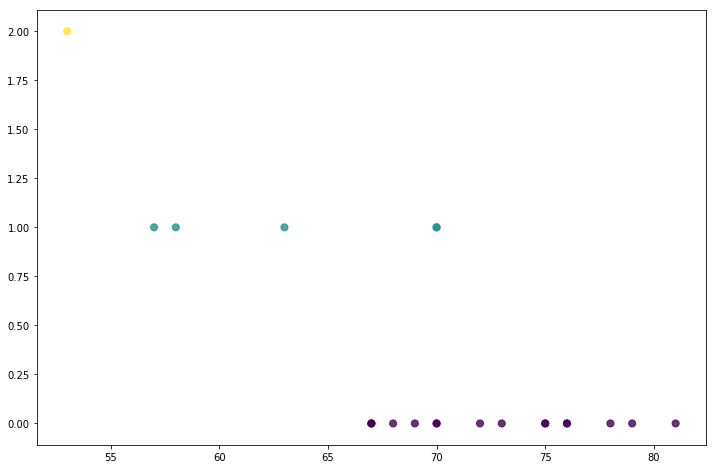

In [1136]:
plt.figure(figsize = (12, 8))
plt.scatter(x1,x2,c = x2-1, alpha = .8, s = 50)
# https://beckernick.github.io/logistic-regression-from-scratch/

In [1143]:
def newtons_method_oring(x, y):                                                             
 

    # Initialize log_likelihood & parameters                                                                   
    Θ_1 = 0                                                                    
    Θ_2 = 0 # The intercept term                                                                 
    Δl = np.Infinity                                                                
    l = log_lh(x, y, Θ_1, Θ_2)                                                                 
    # Convergence Conditions                                                        
    δ = .0000000001                                                                 
    max_iterations = 1000                                                            
    i = 0                                                                           
    while abs(Δl) > δ and i < max_iterations:                                       
        i += 1                                                                      
        g = gradient(x, y, Θ_1, Θ_2)                                                      
        hess = hessian(x, y, Θ_1, Θ_2)                                                 
        H_inv = np.linalg.inv(hess)                                                 
        # @ is syntactic sugar for np.dot(H_inv, g.T)¹
        Δ = H_inv @ g.T                                                             
        ΔΘ_1 = Δ[0][0]                                                              
        ΔΘ_2 = Δ[1][0]                                                              
                                                                                    
        # Perform our update step                                                    
        Θ_1 += ΔΘ_1                                                                 
        Θ_2 += ΔΘ_2                                                                 
                                                                                    
        # Update the log-likelihood at each iteration                                     
        for i in range(0,max_iterations):
            l_new = log_lh(x, y, Θ_1, Θ_2)                                                      
            Δl = l - l_new                                                           
            l = l_new   
        
            print(np.array([Θ_1, Θ_2])) 
# https://www.bogotobogo.com/python/scikit-learn/Maximum-Likelyhood-Estimation-MLE

In [1144]:
newtons_method_oring(x1,x2)

[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537

[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537 15.78800605]
[-0.23685537

In [1185]:
preds = clf.predict(x1.reshape(-1,1))
# accuracy
print("The probability that when temperature is 31F oring is damaged: ",(1-(preds == 31).mean())*100,"% Probability that oring will get damage at 31F") 

The probability that when temperature is 31F oring is damaged:  100.0 % Probability that oring will get damage at 31F


In [1186]:
#https://beckernick.github.io/logistic-regression-from-scratch/
# estimate a logistic regression through IRLS (iteratively reweighted least squares) method. 
# https://statcompute.wordpress.com/tag/irls/
# http://songhuiming.github.io/pages/2017/05/13/gradient-descent-in-solving-linear-regression-and-logistic-regression/
# https://mk-minchul.github.io/IRLS/

In [1142]:
# for i in range (1,maxiter):
#     xb = np.array(x*b)
#     p = 1.0 / (1.0 + np.exp(-1 * xb))
#     w = np.diag(p * (1 - p))
#     z = x * b + w / (y - p)
#     b = np.multiply(x.T,w)*x/ (np.multiply(x,w) * z)
#     n1= y.T * np.log(p)
#     n2= (1-y).T * np.log(1-p)
#     new_ll = n1+n2
#     print('log likelihood for iterations', i, new_ll)
#     if i == 1:
#         old_ll = new_ll
#     elif (new_ll > old_ll):
#         old_ll = new_ll
#     else:
#         print("Nothing found")
#     stderr = np.sqrt(np.diag(np.linalg.pinv(np.array(x.T*w)*x)))
#     z = b/stderr
#     result = [b,stderr,z]
#     print(result)
    

In [ ]:
# #!/usr/bin/env python
# # https://helloacm.com
# def ntsqrt(n):
#     sgn = 0
#     if n < 0:
#         sgn = -1
#         n = -n
#     val = n
#     while True:
#         last = val
#         val = (val + n / val) * 0.5
#         if abs(val - last) < 1e-9:
#             break
#     if sgn < 0:
#         return complex(0, val)
#     return val

# if __name__ == "__main__":
#     print (ntsqrt(9))